<a href="https://colab.research.google.com/github/LikhithBusam/DEEPLEARNING_PROJECTS/blob/main/facemask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 71% 116M/163M [00:00<00:00, 1.21GB/s]
100% 163M/163M [00:00<00:00, 1.02GB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

 data   face-mask-dataset.zip  'kaggle (1).json'   kaggle.json	 sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1637.jpg', 'with_mask_1010.jpg', 'with_mask_2897.jpg', 'with_mask_2571.jpg', 'with_mask_2580.jpg']
['with_mask_2594.jpg', 'with_mask_2425.jpg', 'with_mask_1897.jpg', 'with_mask_626.jpg', 'with_mask_3172.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2867.jpg', 'without_mask_2460.jpg', 'without_mask_3580.jpg', 'without_mask_2224.jpg', 'without_mask_2021.jpg']
['without_mask_496.jpg', 'without_mask_153.jpg', 'without_mask_1866.jpg', 'without_mask_1945.jpg', 'without_mask_2226.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


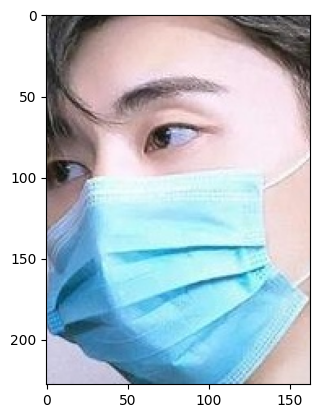

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

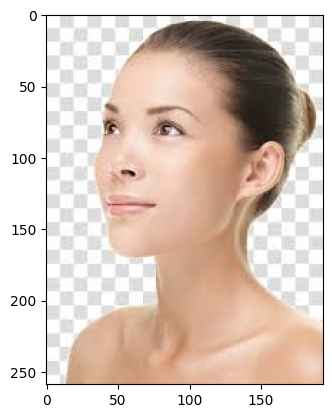

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 252],
        [255, 254, 252],
        [255, 254, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [154, 153, 151],
        [157, 155, 153],
        [157, 155, 154]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [128, 122, 122],
        [130, 124, 124],
        [134, 129, 128]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 24,  25,  22],
        [ 34,  32,  30],
        [ 45,  41,  40]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 28,  27,  25],
        [ 40,  36,  35],
        [ 45,  37,  37]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 36,  34,  33],
        [ 48,  41,  42],
        [ 55,  44,  45]]], dtype=uint8)
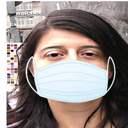

In [ ]:
data[0]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 67,  38,  28],
        [ 95,  56,  51],
        [ 90,  47,  44],
        ...,
        [ 87,  46,  31],
        [ 74,  32,  16],
        [ 87,  45,  29]],

       [[168,  92,  68],
        [185, 100,  75],
        [195, 113,  91],
        ...,
        [ 97,  53,  41],
        [ 80,  36,  23],
        [ 82,  38,  23]],

       [[198, 120,  80],
        [200, 131,  89],
        [205, 136,  94],
        ...,
        [ 87,  43,  31],
        [ 75,  31,  17],
        [ 75,  32,  16]],

       ...,

       [[153,  95,  90],
        [141,  94,  91],
        [132,  93,  91],
        ...,
        [100,  71,  75],
        [ 95,  65,  70],
        [102,  71,  76]],

       [[100,  72,  69],
        [ 83,  55,  56],
        [ 83,  54,  57],
        ...,
        [ 99,  70,  74],
        [ 98,  68,  73],
        [ 98,  67,  72]],

       [[ 80,  55,  51],
        [ 69,  43,  42],
        [ 72,  43,  44],
        ...,
        [105,  75,  81],
        [ 96,  67,  70],
        [100,  70,  71]]], dtype=uint8)
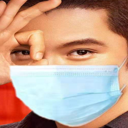

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.2627451 , 0.14901961, 0.10980392],
        [0.37254902, 0.21960784, 0.2       ],
        [0.35294118, 0.18431373, 0.17254902],
        ...,
        [0.34117647, 0.18039216, 0.12156863],
        [0.29019608, 0.1254902 , 0.0627451 ],
        [0.34117647, 0.17647059, 0.11372549]],

       [[0.65882353, 0.36078431, 0.26666667],
        [0.7254902 , 0.39215686, 0.29411765],
        [0.76470588, 0.44313725, 0.35686275],
        ...,
        [0.38039216, 0.20784314, 0.16078431],
        [0.31372549, 0.14117647, 0.09019608],
        [0.32156863, 0.14901961, 0.09019608]],

       [[0.77647059, 0.47058824, 0.31372549],
        [0.78431373, 0.51372549, 0.34901961],
        [0.80392157, 0.53333333, 0.36862745],
        ...,
        [0.34117647, 0.16862745, 0.12156863],
        [0.29411765, 0.12156863, 0.06666667],
        [0.29411765, 0.1254902 , 0.0627451 ]],

       ...,

       [[0.6       , 0.37254902, 0.35294118],
        [0.55294118, 0.36862745, 0.35686275],
        [0.51764706, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 125s 725ms/step - acc: 0.7043 - loss: 0.6462 - val_acc: 0.8843 - val_loss: 0.2528
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 121s 715ms/step - acc: 0.8789 - loss: 0.3013 - val_acc: 0.9074 - val_loss: 0.2155
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 714ms/step - acc: 0.8940 - loss: 0.2450 - val_acc: 0.9124 - val_loss: 0.2109
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 148s 749ms/step - acc: 0.9183 - loss: 0.2099 - val_acc: 0.9240 - val_loss: 0.1933
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 731ms/step - acc: 0.9339 - loss: 0.1702 - val_acc: 0.9240 - val_loss: 0.2019


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - acc: 0.9389 - loss: 0.1646
Test Accuracy = 0.9344804883003235


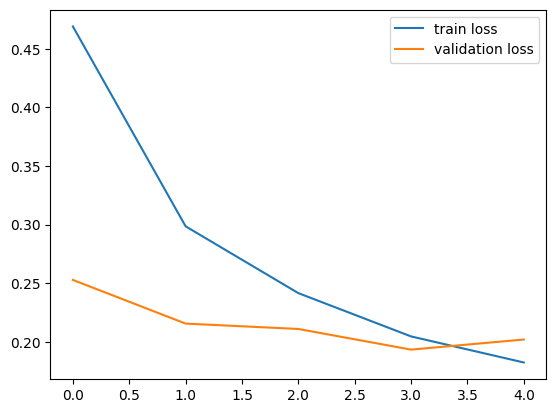

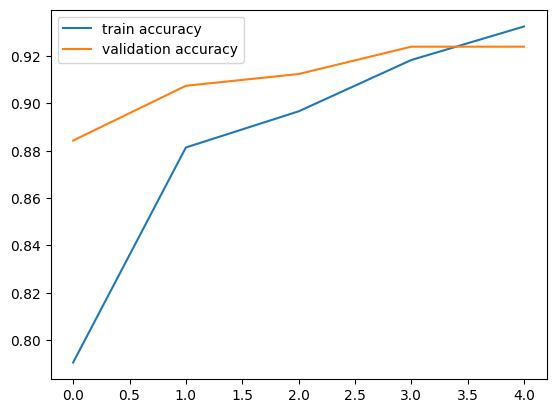

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/Screenshot 2025-06-20 141147.png


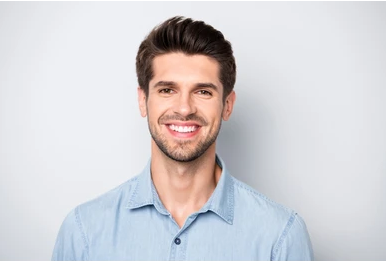

[[0.38383996 0.5963011 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])



print(input_prediction)
input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)




print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/Screenshot 2025-06-20 141014.png


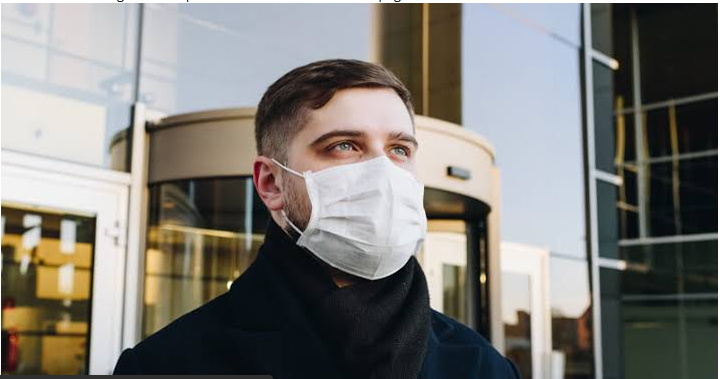

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.47712427 0.5228758 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
# prompt: covert into pickle and mode files to run in vscode

import pickle

# Save the trained model
model.save('face_mask_model.h5')

# Save the test data (optional, but good for testing the loaded model)
with open('X_test_scaled.pkl', 'wb') as f:
  pickle.dump(X_test_scaled, f)

with open('Y_test.pkl', 'wb') as f:
  pickle.dump(Y_test, f)